# Python Homework 3

**Release date:** Friday, February 12<br>
**Due date:** Friday, February 26, at midnight via <font color="blue">Gradescope</font> 

Matthew Xu 5752811

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW3_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 1 (10 Points)

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$). 


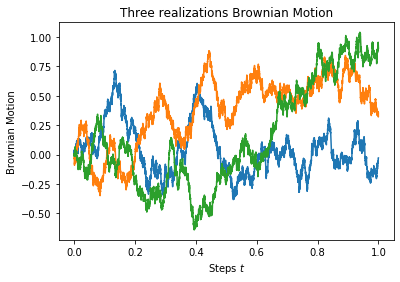

In [21]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
np.random.seed(5)

realizations = 3
n = 10000
t = 1
initial = [0]
for i in range(3):
    bm = np.concatenate([initial, np.cumsum(np.random.normal(0,math.sqrt(t/n),n))])
    #n+1 because inclusion of the inital 0 
    steps = np.linspace(0, t, n+1)
    plt.plot(steps, bm)

plt.xlabel('Steps $t$')
plt.ylabel('Brownian Motion')
plt.title("Three realizations Brownian Motion")

plt.show()

2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

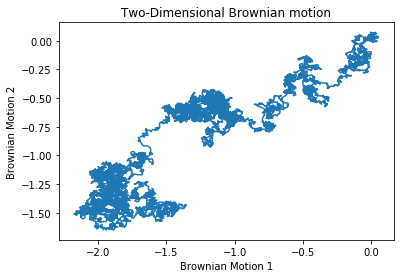

In [4]:
n = 10000
t = 1
initial = [0]

#plotting 2 browian motions for 2 dimensions
bm1 = np.concatenate([initial, np.cumsum(np.random.normal(0,math.sqrt(t/n),n))])
bm2 = np.concatenate([initial, np.cumsum(np.random.normal(0,math.sqrt(t/n),n))])

plt.plot(bm1, bm2)

plt.xlabel('Brownian Motion 1')
plt.ylabel('Brownian Motion 2')
plt.title('Two-Dimensional Brownian motion')

plt.show()

## Problem 2 (10 Points)

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by 

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



1. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

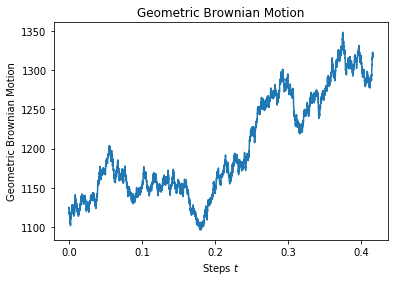

In [70]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!

mu = 0.1
sig = 0.176
s0 = 1125
time = 5/12
iterations = 10000
T = np.linspace(0, time, iterations)

def BrownianMotion(n,t):
    initia1 = [0]
    bm = np.concatenate([initial, np.cumsum(np.random.normal(0,math.sqrt(t/n),n))])
    
    return bm

def GBM(So, mu, sigma, W, N, t):
    
    S = []
    S.append(So)
          
    for i in range(1,N):
        S_i = So * np.exp((mu)*t[i] + sigma * W[i-1])
        S.append(S_i)
        
    return S

W = BrownianMotion(iterations, time)
geo = GBM(s0, mu, sig, W, iterations, T)

plt.plot(T, geo)
plt.xlabel('Steps $t$')
plt.ylabel('Geometric Brownian Motion')
plt.title("Geometric Brownian Motion")

plt.show()
    
    

2. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

In [68]:
payoff = []

#S5/12 is the last index
for i in range(10000):
    W2 = BrownianMotion(iterations, time)
    geo2 = GBM(s0, mu, sig, W2, iterations, T)
    payoff.append(geo2[-1] - min(geo2))

print(sum(payoff)/10000)
    

130.228978759481
